In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [2]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

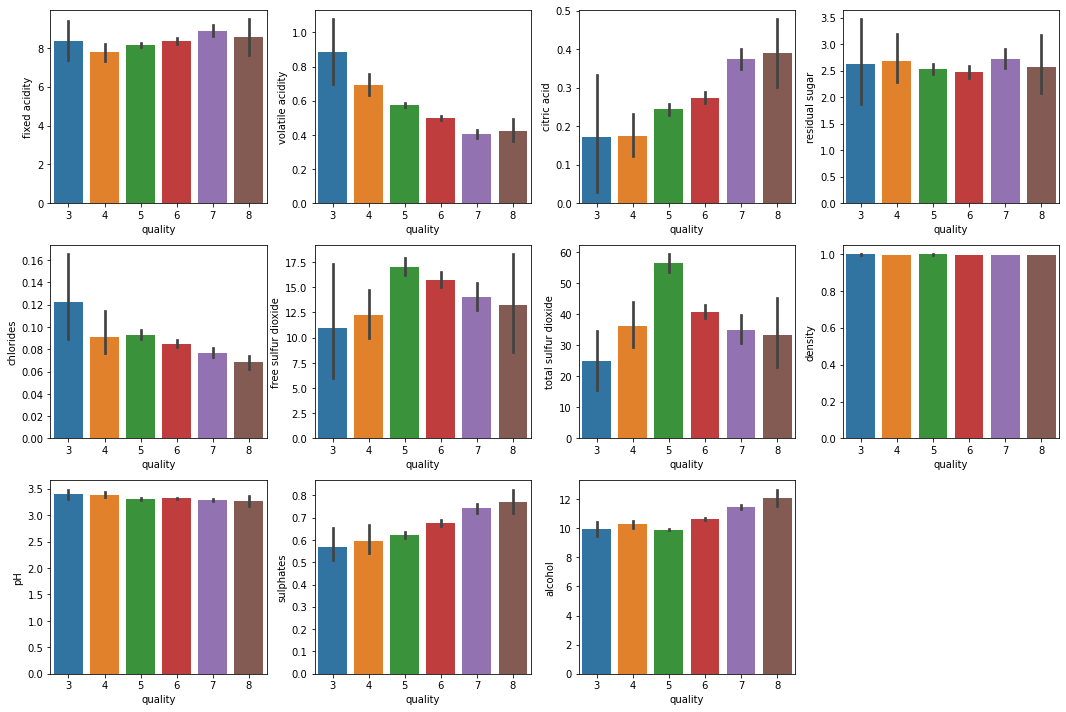

In [6]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine_data)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine_data)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine_data)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine_data)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_data)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_data)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine_data)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine_data)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine_data)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine_data)

plt.tight_layout()

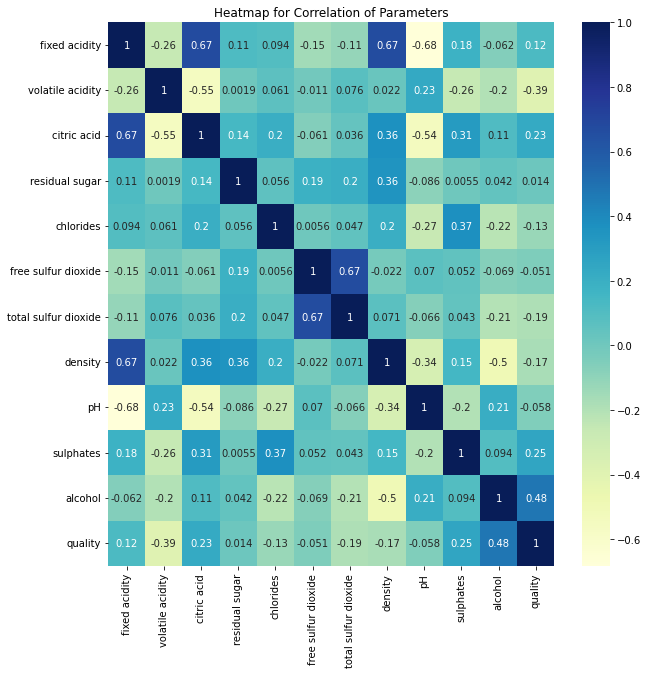

In [7]:
corr = wine_data[wine_data.columns].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.title('Heatmap for Correlation of Parameters')
plt.show()

In [8]:
#from 2 to 6. it is considered bad and above that it is good as 8 is the max value of quality
ranges = (2,6.5,8) 
groups = ['bad','good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins=ranges, labels=groups)

In [9]:
le = LabelEncoder()
wine_data['quality'] = le.fit_transform(wine_data['quality'])
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [10]:
wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
good_quality = wine_data[wine_data['quality'] == 1]
bad_quality = wine_data[wine_data['quality'] == 0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:len(good_quality)]

new_data_frame = pd.concat([good_quality, bad_quality])
new_data_frame = new_data_frame.sample(frac=1)
new_data_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
855,7.6,0.735,0.02,2.5,0.071,10.0,14.0,0.99538,3.51,0.71,11.7,1
365,10.0,0.420,0.50,3.4,0.107,7.0,21.0,0.99790,3.26,0.93,11.8,0
657,12.0,0.500,0.59,1.4,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,1
1540,6.2,0.520,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.6,0
1472,7.6,0.350,0.60,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
389,9.6,0.380,0.31,2.5,0.096,16.0,49.0,0.99820,3.19,0.70,10.0,1
829,5.9,0.610,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,0
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,1
1440,7.2,0.370,0.32,2.0,0.062,15.0,28.0,0.99470,3.23,0.73,11.3,1


In [12]:
new_data_frame['quality'].value_counts()

1    217
0    217
Name: quality, dtype: int64

In [13]:
new_data_frame.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.520021
sulphates               0.383034
citric acid             0.304747
fixed acidity           0.133581
residual sugar          0.069911
pH                     -0.074334
free sulfur dioxide    -0.123549
chlorides              -0.150334
total sulfur dioxide   -0.209833
density                -0.216078
volatile acidity       -0.435022
Name: quality, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X = new_data_frame.drop('quality', axis=1)
y = new_data_frame['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters: ', grid_rf.best_params_)

pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters:  {'n_estimators': 200}
[[34  9]
 [ 7 37]]


              precision    recall  f1-score   support

           0       0.83      0.79      0.81        43
           1       0.80      0.84      0.82        44

    accuracy                           0.82        87
   macro avg       0.82      0.82      0.82        87
weighted avg       0.82      0.82      0.82        87



0.8160919540229885


In [16]:
print("The Accuracy of the Classification: "+str(accuracy_score(y_test,pred)*100), "%")

The Accuracy of the Classification: 81.60919540229885 %
